In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [2]:
zoo_df = pd.read_csv('zoo.csv')

In [3]:
zoo_df.shape

(101, 18)

### Q2. Drop animal_name 


In [4]:
zoo_df1 = zoo_df.drop('animal_name', axis = 1)

In [5]:
zoo_df1.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Q3 Check distribution of target variable

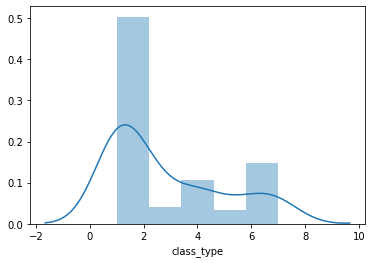

In [6]:
sns.distplot(zoo_df1['class_type'])

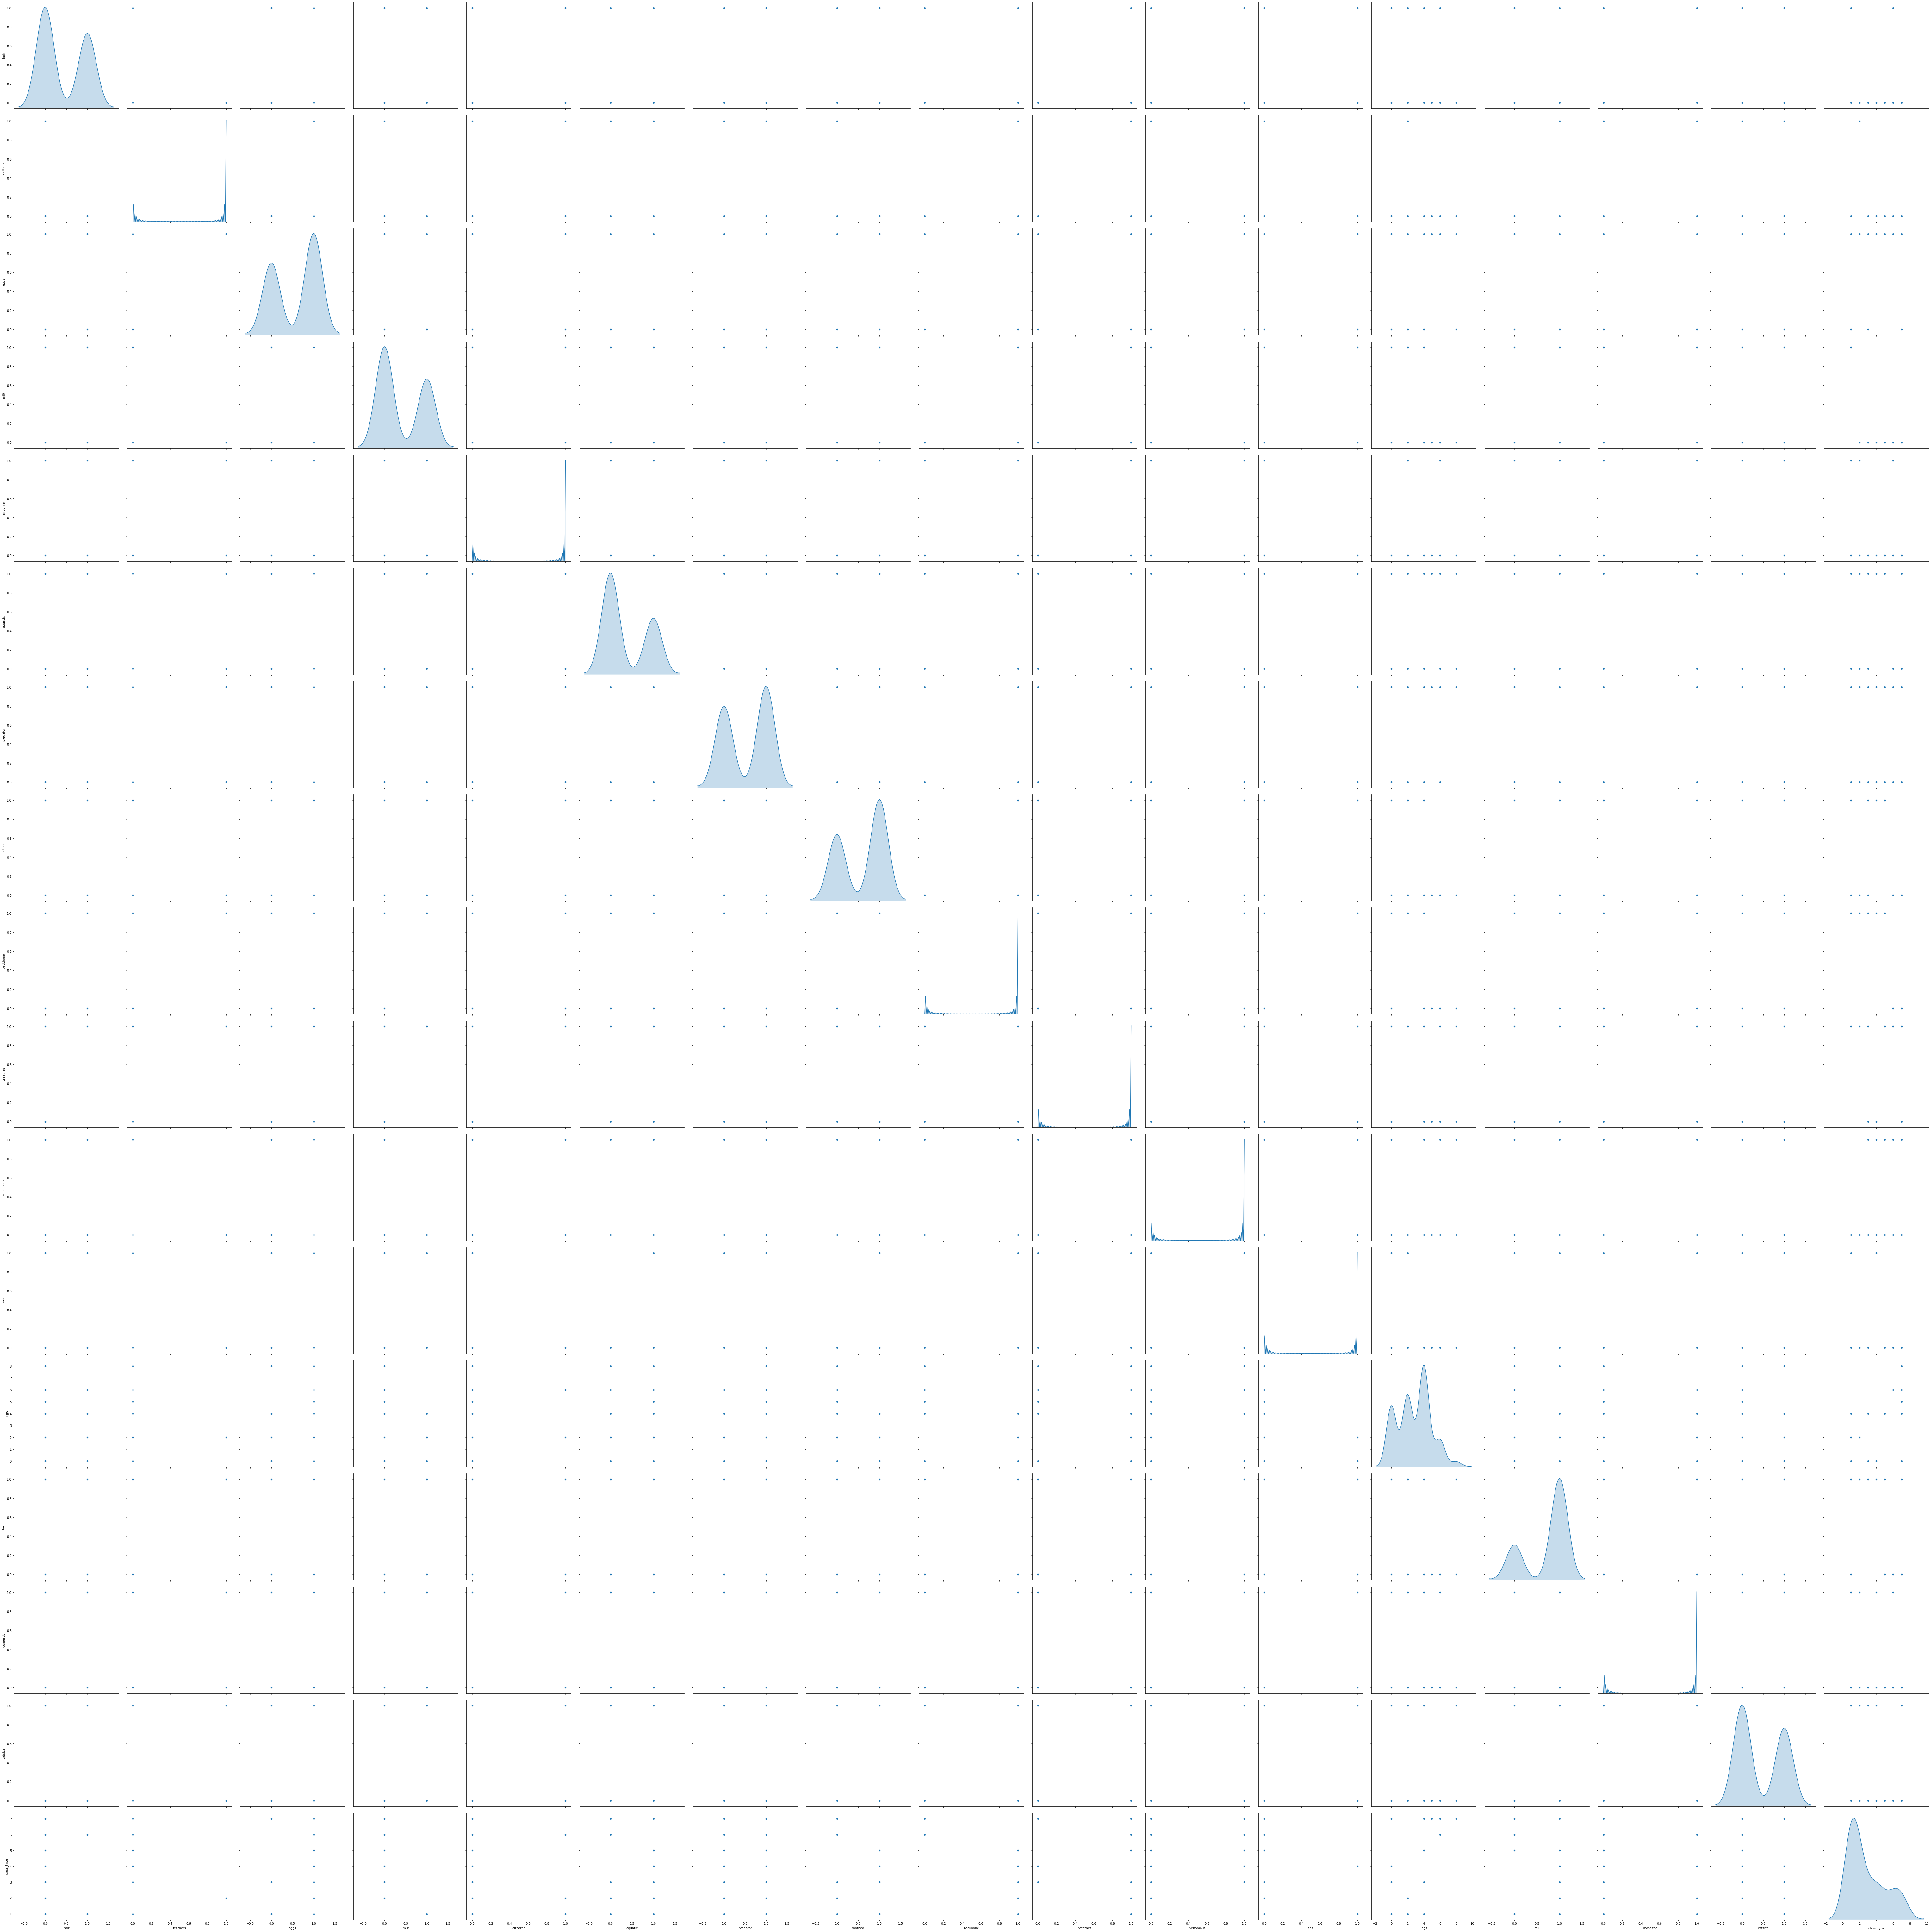

In [7]:
import seaborn as sns
sns.pairplot(zoo_df1,size=5 , diag_kind='kde')

### Q4. Check for missing values

In [8]:
zoo_df1.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

- No missing value.

In [9]:
zoo_df1.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


### Q5. Import class file and understand the data

In [10]:
class_df = pd.read_csv('class.csv')

In [11]:
class_df.shape

(7, 4)

In [12]:
class_df 

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


### Q6. Standardize the data 

In [13]:
from scipy.stats import zscore

In [14]:
zoo_df2 = zoo_df1.drop('class_type', axis = 1)

In [15]:
zoo = zoo_df2.apply(zscore)

### Q7. Find out the linkage matrix

In [16]:
import scipy
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 

In [17]:
scipy.cluster.hierarchy.linkage(zoo, method='average', metric='euclidean')

array([[  0.        ,   3.        ,   0.        ,   2.        ],
       [  1.        ,   5.        ,   0.        ,   2.        ],
       [  2.        ,   8.        ,   0.        ,   2.        ],
       [  4.        ,  10.        ,   0.        ,   2.        ],
       [ 17.        , 102.        ,   0.        ,   3.        ],
       [  6.        ,  31.        ,   0.        ,   2.        ],
       [ 34.        ,  73.        ,   0.        ,   2.        ],
       [ 82.        , 107.        ,   0.        ,   3.        ],
       [ 12.        , 103.        ,   0.        ,   3.        ],
       [ 38.        , 109.        ,   0.        ,   4.        ],
       [ 61.        , 110.        ,   0.        ,   5.        ],
       [ 18.        ,  60.        ,   0.        ,   2.        ],
       [ 92.        , 112.        ,   0.        ,   3.        ],
       [ 65.        , 106.        ,   0.        ,   3.        ],
       [ 70.        , 114.        ,   0.        ,   4.        ],
       [ 44.        , 104

In [18]:
Z = linkage(zoo, 'average')
c, coph_dists = cophenet(Z , pdist(zoo))

c

0.8873446204581305

### Q8. Plot the dendrogram.

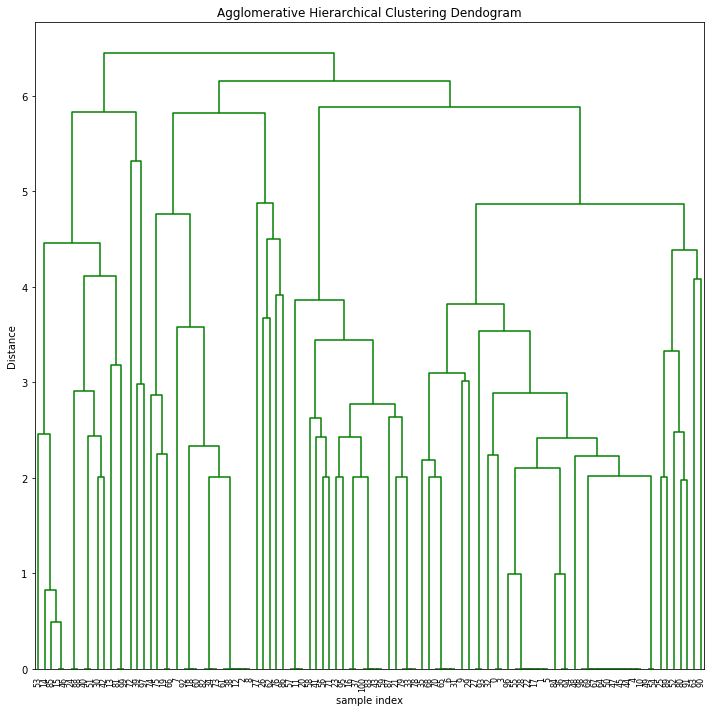

In [19]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

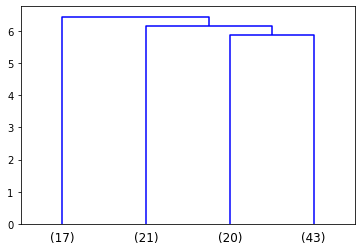

In [20]:
scipy.cluster.hierarchy.dendrogram(Z,p=4,truncate_mode='lastp')
plt.show()

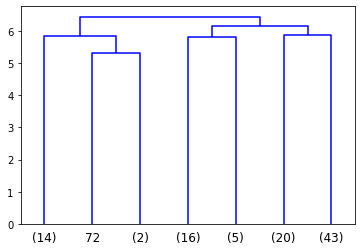

In [21]:
scipy.cluster.hierarchy.dendrogram(Z,p=7,truncate_mode='lastp')
plt.show()

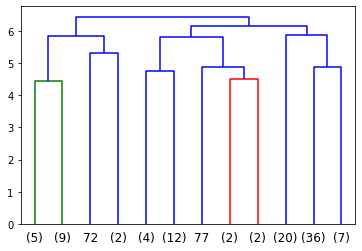

In [22]:
scipy.cluster.hierarchy.dendrogram(Z,p=12,truncate_mode='lastp')
plt.show()

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

In [23]:
scipy.cluster.hierarchy.fcluster(Z, t=5.3, criterion='distance')

array([7, 7, 4, 7, 7, 7, 7, 4, 4, 7, 7, 6, 4, 1, 1, 1, 6, 7, 4, 4, 6, 6,
       7, 6, 1, 7, 5, 7, 7, 7, 1, 7, 7, 6, 4, 7, 7, 6, 4, 2, 1, 6, 1, 6,
       7, 7, 1, 7, 7, 7, 7, 1, 7, 1, 7, 7, 6, 6, 6, 6, 4, 4, 5, 7, 7, 7,
       4, 7, 7, 7, 7, 6, 3, 4, 4, 4, 5, 5, 6, 6, 7, 1, 4, 6, 7, 1, 5, 6,
       1, 7, 7, 7, 4, 7, 7, 6, 7, 2, 7, 1, 6], dtype=int32)

- as per dendogram 7 might be a good choice for optimum no. of clusters.

In [24]:
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean',  linkage='average')
model.fit(zoo)

cluster_labels = model.labels_
cluster_labels

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 4, 4, 4, 3, 1, 2, 2, 3, 3,
       1, 3, 4, 1, 0, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 3, 2, 5, 4, 3, 4, 3,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 3, 3, 3, 3, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 6, 2, 2, 2, 0, 0, 3, 3, 1, 4, 2, 3, 1, 4, 0, 3,
       4, 1, 1, 1, 2, 1, 1, 3, 1, 5, 1, 4, 3], dtype=int64)

In [25]:
zoo['labels'] = cluster_labels
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,labels
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,1
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,2
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,1
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,1
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,5
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,4


- labels added to the original dataset & compare 

In [26]:
zoo_df["labels"] = cluster_labels

In [27]:
pd.crosstab(zoo_df['class_type'],zoo_df['labels'])

labels,0,1,2,3,4,5,6
class_type,,,,,,,
1,0,37,4,0,0,0,0
2,0,0,0,20,0,0,0
3,2,3,0,0,0,0,0
4,1,0,12,0,0,0,0
5,1,3,0,0,0,0,0
6,0,0,0,0,6,2,0
7,1,0,0,0,8,0,1
